In [1]:
import numpy as np
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

In [2]:
data = pd.read_csv('CPI.csv')
data['pai'] = np.log(data['CPIAUCSL']).diff()

In [3]:
data.head()

,DATE,CPIAUCSL,pai
0,1947-01-01,21.48,NaN
1,1947-02-01,21.62,0.006497
2,1947-03-01,22.00,0.017424
3,1947-04-01,22.00,0.000000
4,1947-05-01,21.95,-0.002275


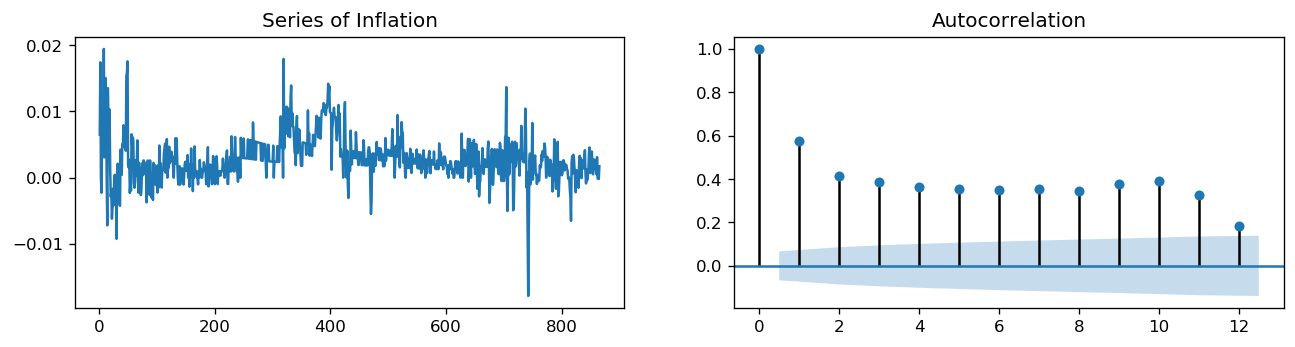

In [4]:
#(a)
plt.rcParams.update({'figure.figsize':(13,3), 'figure.dpi':120})
fig, axes = plt.subplots(1, 2, sharex=False)
axes[0].plot(data.pai); axes[0].set_title('Series of Inflation')
plot_acf(data.pai.dropna(), ax=axes[1], lags=12)
plt.show()

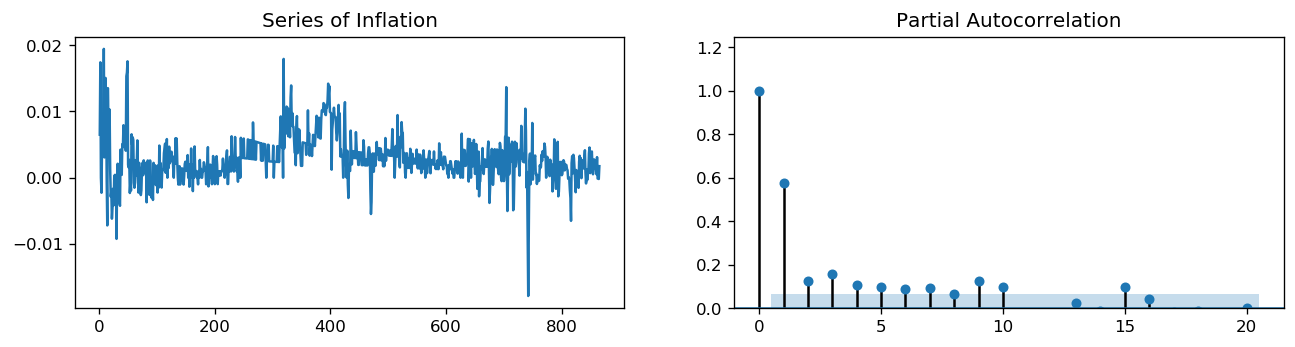

In [13]:
#(b) Own version
fig, axes = plt.subplots(1, 2, sharex=False)
axes[0].plot(data.pai); axes[0].set_title('Series of Inflation')
axes[1].set(ylim=(0,1.25))
plot_pacf(data.pai.dropna(), ax=axes[1], lags=20)
plt.show()
#choose AR(1)?

In [14]:
import statsmodels.api as sm
# 1,1,2 ARIMA Model
model = sm.tsa.arima.ARIMA(data.pai.dropna(), order=(1,0,0))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                    pai   No. Observations:                  865
Model:                 ARIMA(1, 0, 0)   Log Likelihood                3856.374
Date:                Mon, 26 Apr 2021   AIC                          -7706.749
Time:                        20:43:17   BIC                          -7692.461
Sample:                             0   HQIC                         -7701.280
                                - 865                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0029      0.000     12.422      0.000       0.002       0.003
ar.L1          0.5755      0.016     35.379      0.000       0.544       0.607
sigma2       7.85e-06      2e-07     39.234      0.0

/Users/tanyukai/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/tanyukai/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/tanyukai/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/tanyukai/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [15]:
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
model = AutoReg(data.pai.dropna(), 1)
model_fit = model.fit()
print(model_fit.summary())

                            AutoReg Model Results                             
Dep. Variable:                    pai   No. Observations:                  865
Model:                     AutoReg(1)   Log Likelihood                3852.184
Method:               Conditional MLE   S.D. of innovations              0.003
Date:                Mon, 26 Apr 2021   AIC                            -11.748
Time:                        20:43:25   BIC                            -11.731
Sample:                             1   HQIC                           -11.742
                                  865                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0012      0.000      9.723      0.000       0.001       0.001
pai.L1         0.5755      0.028     20.704      0.000       0.521       0.630
                                    Roots           

/Users/tanyukai/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [16]:
sel = ar_select_order(data.pai.dropna(), maxlag=20, ic='aic')
sel_fit = sel.model.fit()
print(sel_fit.summary())

                            AutoReg Model Results                             
Dep. Variable:                    pai   No. Observations:                  865
Model:                    AutoReg(15)   Log Likelihood                3919.851
Method:               Conditional MLE   S.D. of innovations              0.002
Date:                Mon, 26 Apr 2021   AIC                            -12.021
Time:                        20:43:42   BIC                            -11.926
Sample:                            15   HQIC                           -11.985
                                  865                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0004      0.000      3.191      0.001       0.000       0.001
pai.L1         0.4414      0.034     13.123      0.000       0.376       0.507
pai.L2         0.0763      0.036      2.098      0.0

/Users/tanyukai/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/tanyukai/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [18]:
sel = ar_select_order(data.pai.dropna(), maxlag=20, ic='bic')
sel_fit = sel.model.fit()
print(sel_fit.summary())

                            AutoReg Model Results                             
Dep. Variable:                    pai   No. Observations:                  865
Model:                    AutoReg(12)   Log Likelihood                3907.258
Method:               Conditional MLE   S.D. of innovations              0.002
Date:                Mon, 26 Apr 2021   AIC                            -11.966
Time:                        20:55:49   BIC                            -11.888
Sample:                            12   HQIC                           -11.936
                                  865                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0005      0.000      3.771      0.000       0.000       0.001
pai.L1         0.4287      0.034     12.742      0.000       0.363       0.495
pai.L2         0.0509      0.036      1.396      0.1

/Users/tanyukai/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/tanyukai/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
